In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

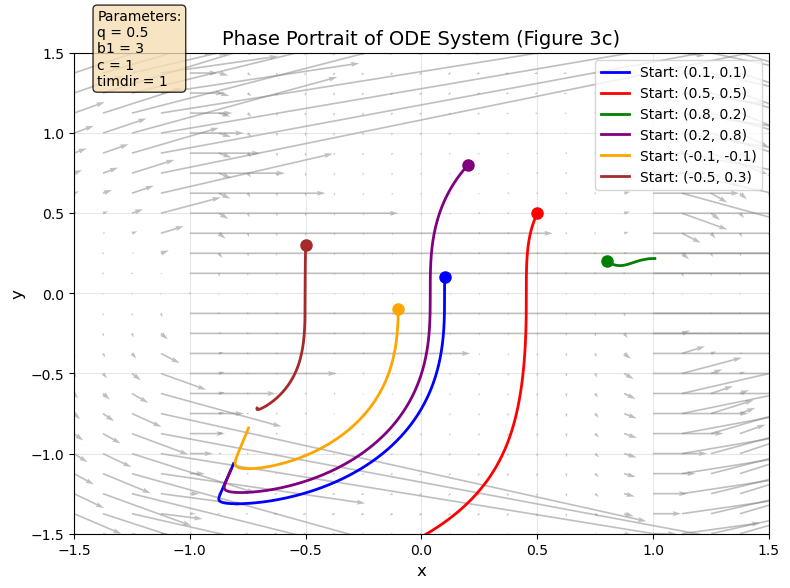

In [9]:
# Define the ODE function
def funODE(t, z):
    q = 1/2
    b1 = 3
    c = 1
    timdir = 1
    
    x, y = z

    Denom = timdir * ((1 + q) * (x**2 - 1) - q * y**2)**2

    # 🚨 avoid singularities
    if Denom < 1e-6:
        return [0.0, 0.0]

    z1 = q * y**2 * (x * (x + q * x - q * y) * b1
                     - (1 + q - q * x * y + q * y**2) * c) / Denom

    z2 = q * (1 - x**2) * (((1 + q) * x * y - q * y**2) * b1
                           - (1 + q) * (1 - x**2 + x * y) * c) / Denom

    return [z1, z2]

# Create grid for vector field
X, Y = np.meshgrid(
    np.linspace(-1.5, 1.5, 25),
    np.linspace(-1.5, 1.5, 25)
)

U = np.zeros_like(X)
V = np.zeros_like(Y)

# Evaluate vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dx, dy = funODE(0, [X[i, j], Y[i, j]])
        U[i, j] = dx
        V[i, j] = dy
# Create figure
plt.figure(figsize=(8, 6))
plt.quiver(
    X, Y, U, V,
    color='gray',
    alpha=0.5,
    angles='xy',
    scale_units='xy',
    scale=30
)

# Initial conditions for trajectories
initial_conditions = [
    [0.1, 0.1],
    [0.5, 0.5],
    [0.8, 0.2],
    [0.2, 0.8],
    [-0.1, -0.1],
    [-0.5, 0.3]
]

# Colors for different trajectories
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

# Time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Plot phase portrait
for idx, z0 in enumerate(initial_conditions):
    sol = solve_ivp(funODE, t_span, z0, t_eval=t_eval, method='RK45', rtol=1e-8, atol=1e-8)
    
    plt.plot(sol.y[0], sol.y[1], '-', color=colors[idx], linewidth=2,
             label=f'Start: ({z0[0]:.1f}, {z0[1]:.1f})')
    plt.plot(z0[0], z0[1], 'o', color=colors[idx], markersize=8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Phase Portrait of ODE System (Figure 3c)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

# Add parameter info
params_text = f"Parameters:\nq = {1/2}\nb1 = {3}\nc = {1}\ntimdir = {1}"
plt.text(-1.4, 1.3, params_text, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()